# Regression

[Tutorial](https://realpython.com/linear-regression-in-python/)

Regression analysis is one of the most important fields in statistics and machine learning. There are many regression methods available. Linear regression is one of them.

- Regression searches for relationships among variables.
- Find a function that maps some features or variables to others sufficiently well.
- The **dependent features** are called the dependent variables, outputs, or responses.
- The **independent features** are called the independent variables, inputs, or predictors.
- Regression problems usually have one continuous and unbounded dependent variable
- The inputs, however, can be continuous, discrete, or even categorical data 

## Linear Regression

Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.

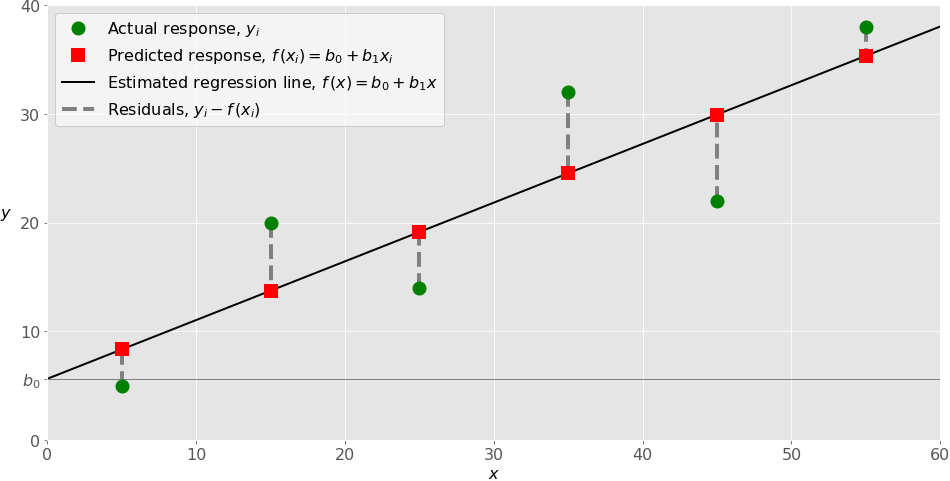

## Multiple Linear Regression

Multiple or multivariate linear regression is a case of linear regression with two or more independent variables.

The estimated regression function is 𝑓(𝑥₁, …, 𝑥ᵣ) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ +𝑏ᵣ𝑥ᵣ, and there are 𝑟 + 1 weights to be determined when the number of inputs is 𝑟.

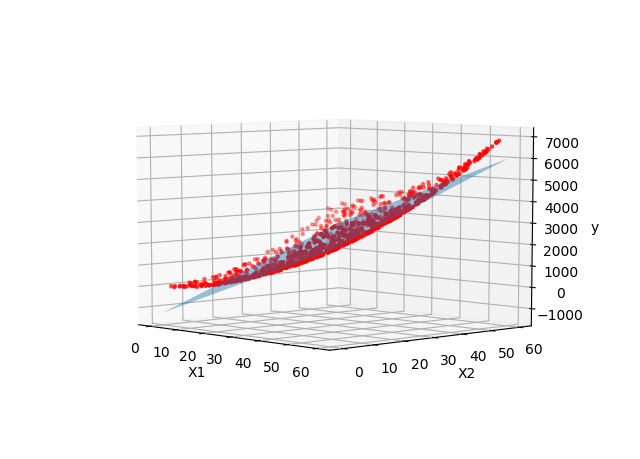

## Polynomial regression

You can regard polynomial regression as a generalized case of linear regression. You assume the polynomial dependence between the output and inputs and, consequently, the polynomial estimated regression function.

In other words, in addition to linear terms like 𝑏₁𝑥₁, your regression function 𝑓 can include non-linear terms such as 𝑏₂𝑥₁², 𝑏₃𝑥₁³, or even 𝑏₄𝑥₁𝑥₂, 𝑏₅𝑥₁²𝑥₂, and so on.

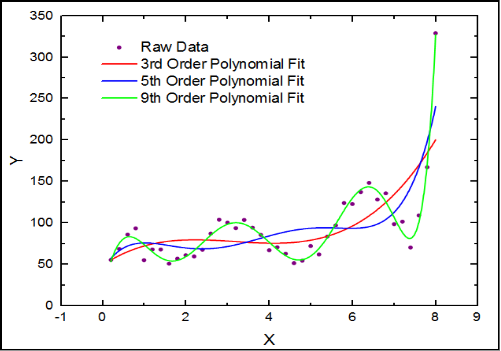

## Underfitting and Overfitting

**Underfitting** occurs when a model can’t accurately capture the dependencies among data, usually as a consequence of its own simplicity. It often yields a low 𝑅² with known data and bad generalization capabilities when applied with new data.

**Overfitting** happens when a model learns both dependencies among data and random fluctuations. In other words, a model learns the existing data too well. Complex models, which have many features or terms, are often prone to overfitting. When applied to known data, such models usually yield high 𝑅². However, they often don’t generalize well and have significantly lower 𝑅² when used with new data.

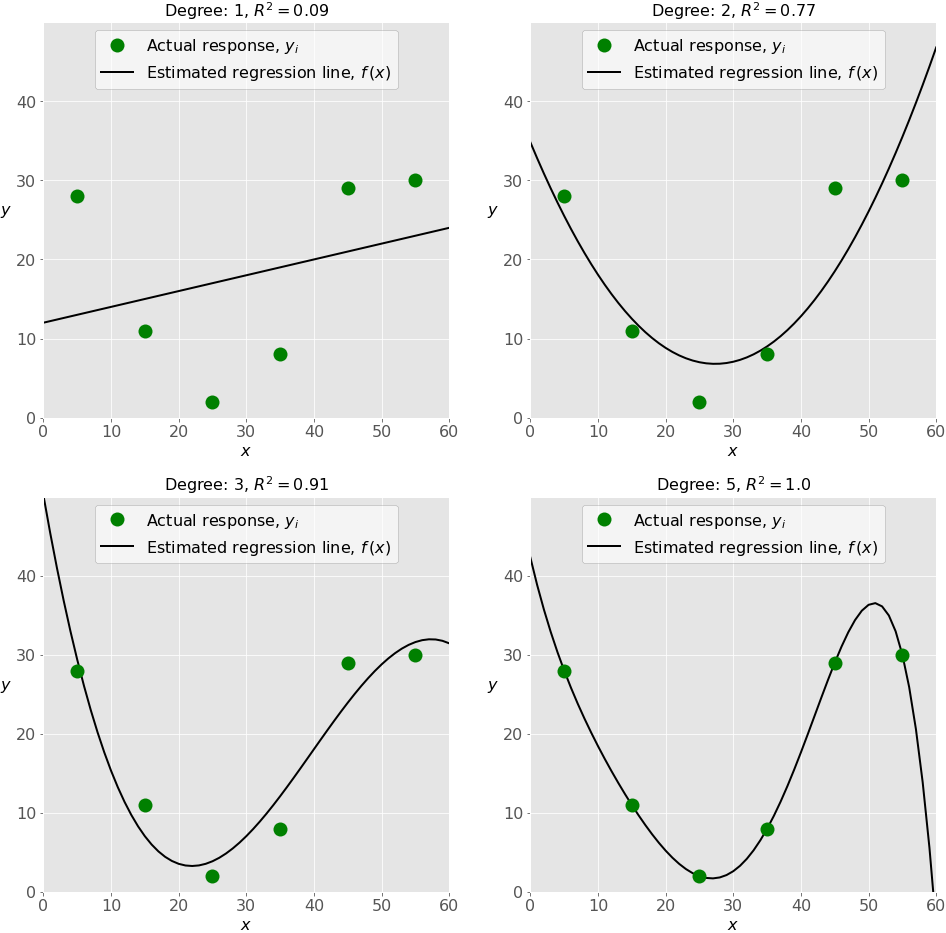


# Linear Regression with Scikit Learn library

## Loading the fuel dataset

In [1]:
import pandas as pd

fuel_df = pd.read_csv('fuel_data.txt', delimiter='\t')
fuel_df['duration_minutes'] = fuel_df['duration']\
                                    .apply(lambda time: int(time.split(':')[0]) * 60 + int(time.split(':')[1]))

fuel_df.head()

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons,duration_minutes
0,2018.06.03,00:03,01:16,17,15,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1,73
1,2018.06.03,08:20,09:29,19,24,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2,69
2,2018.06.03,13:00,15:00,30,28,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3,100
3,2018.06.04,15:30,16:30,29,28,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1,48
4,2018.06.04,18:18,19:10,30,25,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1,49


## Building the regressor

First let's do a simple linear model where we try to estimate the distance based on the traveled minutes. As per convention we name the matrix containing the predictor variables as X and the variable containing the target as y.

We use simple holdout validation to measure the performance of the model.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# When dealing with single predictor variables we need to reshape the vector we get into a matrix
X = fuel_df['duration_minutes'].values.reshape(-1, 1)
y = fuel_df['dist']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluate the model using RMSE and MAE

In [3]:
from math import sqrt

y_pred = model.predict(X_test)

rmse1 = sqrt(mean_squared_error(y_test, y_pred))
mae1 = mean_absolute_error(y_test, y_pred)
print("RMSE = ", rmse1)
print("MAE = ", mae1)

RMSE =  9.796223220262325
MAE =  7.218690232923228


## Visualisation of the model

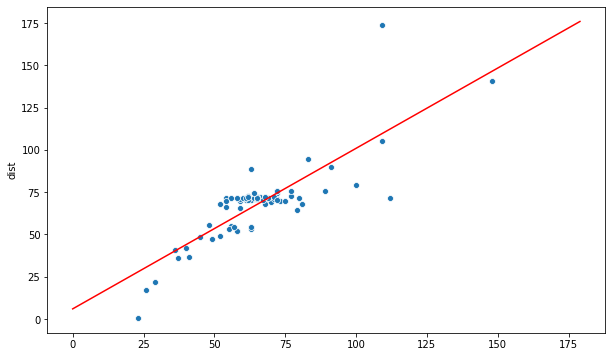

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

interval = np.arange(0, 180)
y_interval = model.predict(interval.reshape(-1, 1))

plt.figure(figsize = (10,6))
X_train_orig = [arr[0] for arr in X_train]
sns.scatterplot(x = X_train_orig, y = y_train)
plt.plot(interval, y_interval, color = 'r')

From physics we know that **s = v * t**.  So let's use the speed column as well to improve our model

In [5]:
X = fuel_df[['duration_minutes' , 'speed']].values
y = fuel_df['dist']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)


model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

rmse2 = sqrt(mean_squared_error(y_test, y_pred))
mae2 = mean_absolute_error(y_test, y_pred)
print("RMSE = ", rmse2)
print("MAE = ", mae2)

RMSE =  3.523379802675523
MAE =  1.9306478799891345


**Let's see if there are any other highly correlated attributes we could use for improving the accuracy of estimating the distance**

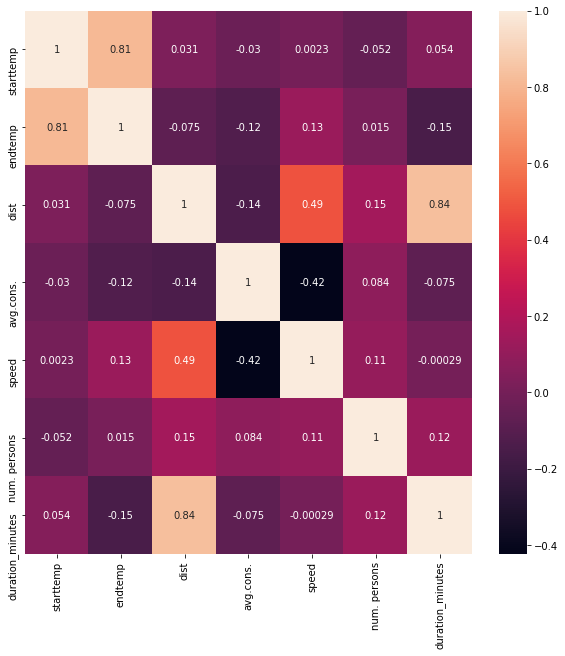

In [6]:
plt.figure(figsize = (10,10))
sns.heatmap(fuel_df.corr(), annot=True)

In [7]:
X = fuel_df[['duration_minutes' , 'speed', 'num. persons']].values
y = fuel_df['dist']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)


model3 = LinearRegression()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

rmse3 = sqrt(mean_squared_error(y_test, y_pred))
mae3 = mean_absolute_error(y_test, y_pred)
print("RMSE = ", rmse3)
print("MAE = ", mae3)

RMSE =  3.5568743208171676
MAE =  1.888260853494937


In [8]:
print("Model 1: ", ("RMSE = ",rmse1,"MAE = ", mae1))
print("Model 2: ", ("RMSE = ",rmse2,"MAE = ", mae2))
print("Model 3: ", ("RMSE = ",rmse3,"MAE = ", mae3))

Model 1:  ('RMSE = ', 9.796223220262325, 'MAE = ', 7.218690232923228)
Model 2:  ('RMSE = ', 3.523379802675523, 'MAE = ', 1.9306478799891345)
Model 3:  ('RMSE = ', 3.5568743208171676, 'MAE = ', 1.888260853494937)


# Multiple Linear Regression with Scikit Learn library

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x ) 

df = pd.read_csv('multivar_poly_synth.csv')
df.head()

,x1,x2,y
0,-1.24869,-1.72494,-14.70222
1,3.22351,-1.15420,-13.45638
2,3.05634,-13.96543,-407.35140
3,4.14594,9.68764,-114.54969
4,0.26918,1.83166,-8.97082


In [10]:
df.describe()

,x1,x2,y
count,250.00000,250.00000,250.00000
mean,1.84735,0.15275,-54.04077
std,1.90793,5.12507,76.31689
min,-3.05665,-13.96543,-526.70219
25%,0.61168,-3.26172,-58.19205
50%,1.84484,-0.02292,-24.40812
75%,3.19914,3.86383,-10.65910
max,6.86968,15.15429,4.01796


## Using pairplot from seaborn to see the relation between our target and predictors

<Figure size 1080x1080 with 0 Axes>

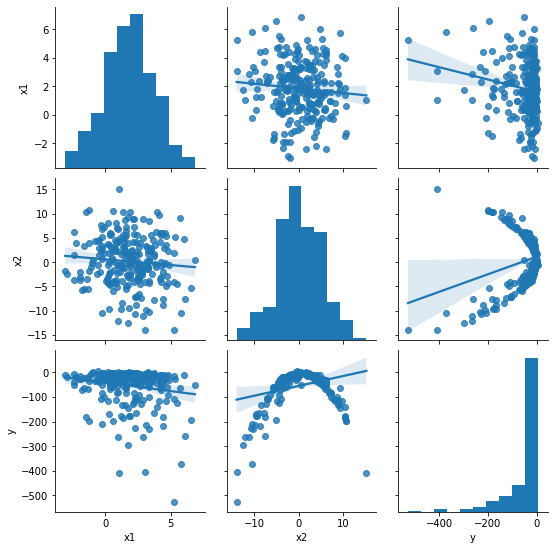

In [11]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, kind='reg')

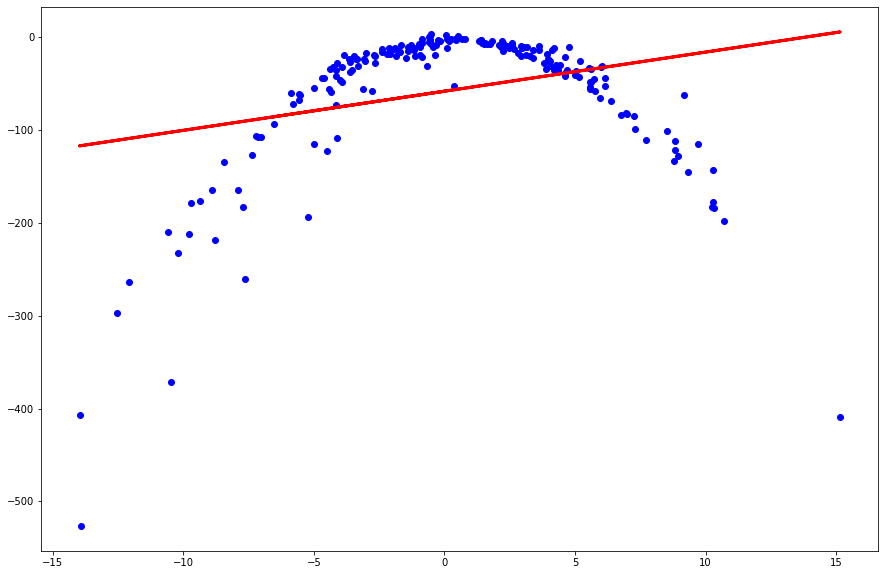

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Training phase
X = df['x2'].values.reshape(-1, 1)
y = df['y'].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state=101)


model1 = LinearRegression()

model1.fit(X_train1, y_train1)

# Test phase
predictions_train1 = model1.predict(X_train1)

# Visualizing the regressor
plt.figure(figsize=(15,10))
plt.scatter(X_train1, y_train1, color='blue')
plt.plot(X_train1, predictions_train1, color = 'red', linewidth=3)

plt.show()

## Using two predictors

In [13]:
columns = ['x1', 'x2']
X = df[columns].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state=101)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualization of the plane

Text(0.5, 0, 'y')

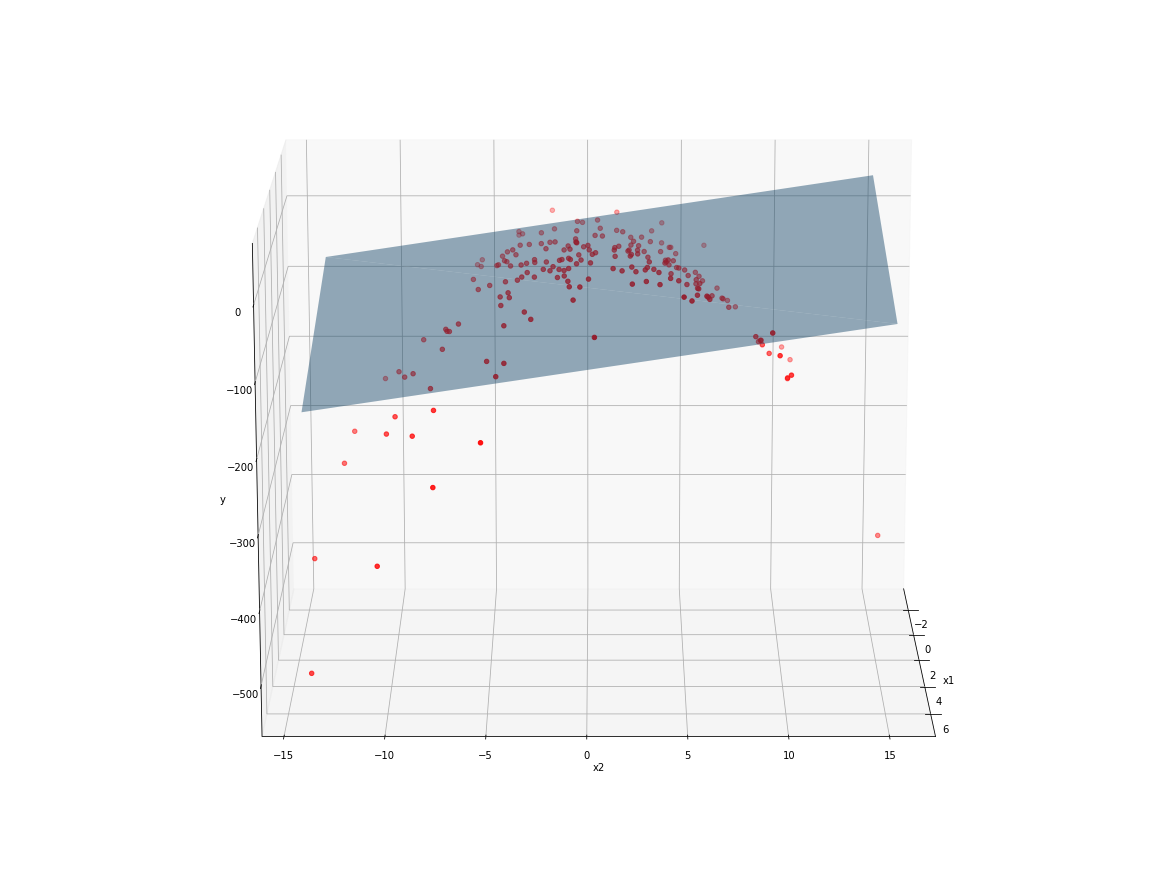

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,12))
plt.clf()
ax = Axes3D(fig, elev=15, azim=0)

ax.scatter(X_train2[:, 0], X_train2[:, 1], y_train2, c = 'r', marker='o')
# We plot the surface by giving xyz coordinates for as  
ax.plot_trisurf(np.array([df['x1'].min(), df['x1'].min(), df['x1'].max(), df['x1'].max()]), 
                np.array([df['x2'].min(), df['x2'].max(), df['x2'].min(), df['x2'].max()]),
                model2.predict(np.array([[df['x1'].min(), df['x2'].min()], 
                                         [df['x1'].min(), df['x2'].max()], 
                                         [df['x1'].max(), df['x2'].min()], 
                                         [df['x1'].max(), df['x2'].max()]])),
               alpha=.45)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

## Building a 3D animation for a better visualization

In [15]:
from matplotlib.animation import FuncAnimation


# Update function that updates the plot
def update(i):
    ax.azim = i
    return ax

anim = FuncAnimation(fig, update, frames=range(361), interval=33)

anim.save('3d_linear_regression_plot.gif', dpi=80, writer='imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


# Polynomial Regression with Scikit Learn library

Let's try to use Polynomial regression using the x2 predictory only. We will assume the original model is a quadratic equation. We can use Scikit Learn's PolynomialFeatures class to extend our data with polynomial attributes.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

X = df['x2'].values.reshape(-1, 1)
poly = PolynomialFeatures(degree = 2)

X_train3o, X_test3o, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state=101)
X_train3 = poly.fit_transform(X_train3o)
X_test3 = poly.fit_transform(X_test3o)

model3 = LinearRegression()
model3.fit(X_train3, y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

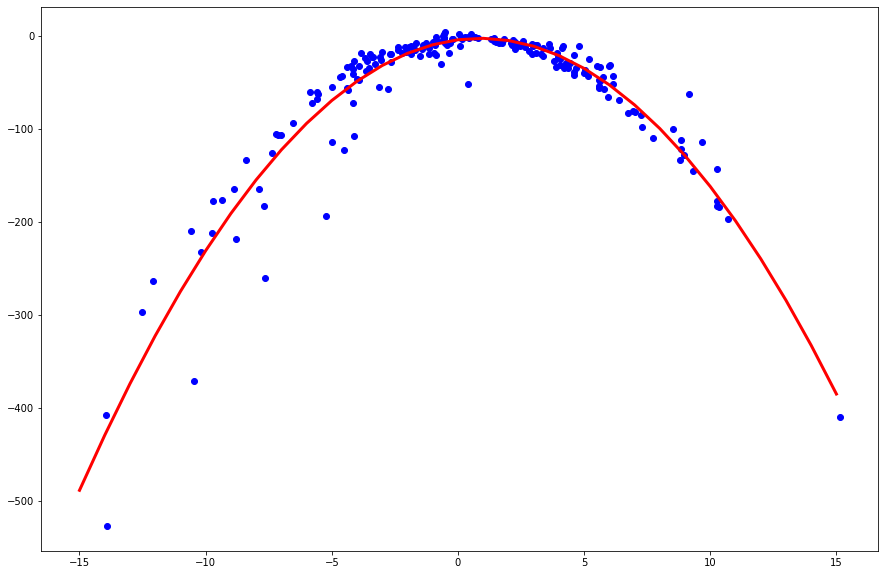

In [17]:
sequence = np.array(range(-15, 16)).reshape(-1, 1)
poly_sequence = poly.fit_transform(sequence)
predictions_sequence = model3.predict(poly_sequence)

plt.figure(figsize=(15,10))
plt.scatter(X_train3o, y_train3, color='blue')
plt.plot(sequence, predictions_sequence, color='red', linewidth=3)

plt.show()

## Using both predictor variables to create a model

In [18]:
from sklearn.preprocessing import PolynomialFeatures


X = df[columns].values
poly = PolynomialFeatures(degree = 6)

X_train4o, X_test4o, y_train4, y_test4 = train_test_split(X, y, test_size = 0.2, random_state=101)
X_train4 = poly.fit_transform(X_train4o)
X_test4 = poly.fit_transform(X_test4o)

model4 = LinearRegression()
model4.fit(X_train4, y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**We can use the intercept_ attribute of the trained model to see where the model is intersecting the y axes. We can also see the model's parameters using the coef_ attribute**

In [19]:
print(model4.intercept_)
print(model4.coef_)

-487930671.37884575
[ 4.87930669e+08 -3.23965302e-01 -2.51286227e-01 -6.87850594e-01
  2.89171232e-01 -1.75291677e+00  2.09252071e-01  4.25555339e-01
  9.33576437e-02 -1.54414898e-02  3.49841233e-02 -5.10077331e-02
  2.07289618e-02  1.21408451e-02 -8.80410029e-04 -4.16579631e-02
  6.57358067e-03 -6.30980923e-03 -9.35126646e-04 -1.09994556e-03
  1.24734555e-04  4.44709208e-03 -9.89355180e-05  6.13591849e-04
  1.40875022e-04 -6.17350970e-06 -9.99085110e-05  5.49674885e-06]


**As we can see model4 has a very big coefficient. This could be handled with regularization methods like Ridge and Lasso regression**

In [20]:
from sklearn.linear_model import Ridge, Lasso

model5 = Ridge(alpha=0.0001)
model5.fit(X_train4, y_train4)

model6 = Lasso(alpha=0.0001, max_iter=100000)
model6.fit(X_train4, y_train4)

print(model5.intercept_)
print(model5.coef_)
print(model6.intercept_)
print(model6.coef_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.03742e-19): result may not be accurate.
  overwrite_a=True).T


-1.1844932841345752
[ 0.         -0.35723604 -0.25116434 -0.67733905  0.28478714 -1.76168284
  0.20812264  0.43034676  0.07453378  0.00896638  0.03578931 -0.0380665
  0.00008752 -0.00603825 -0.00126446 -0.03371701  0.00369304 -0.00866729
  0.00040626 -0.00042019 -0.00005675  0.00328443  0.00016482  0.00117806
  0.00002103  0.00009142  0.00002558  0.00000596]
-1.185639074734354
[ 0.         -0.35629925 -0.25104922 -0.67664378  0.28465571 -1.76165555
  0.20777527  0.4303625   0.07450209  0.00896474  0.03574523 -0.03804599
  0.00008309 -0.00603752 -0.00126449 -0.03368783  0.00368725 -0.00866226
  0.000406   -0.00042001 -0.00005674  0.00328182  0.00016522  0.00117744
  0.00002106  0.00009139  0.00002558  0.00000596]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 835.4673290744795, tolerance: 127.20537665460134
  positive)


**As we can see these coefficients are a lot smaller. Lets evaluate our models and compare them**

In [21]:
from sklearn.metrics import mean_squared_error

print(f'MSE for model1 (Linear, x2): {mean_squared_error(model1.predict(X_test1),y_test1)}')
print(f'MSE for model2 (Linear, x1 + x2): {mean_squared_error(model2.predict(X_test2),y_test2)}')
print(f'MSE for model3 (Polynomial, degree 2, x2): {mean_squared_error(model3.predict(X_test3),y_test3)}')
print(f'MSE for model4 (Polynomial, degree 6, x1 + x2): {mean_squared_error(model4.predict(X_test4),y_test4)}')
print(f'MSE for model5 (Polynomial Ridge, degree 6, x1 + x2): {mean_squared_error(model5.predict(X_test4),y_test4)}')
print(f'MSE for model6 (Polynomial Lasso, degree 6, x1 + x2): {mean_squared_error(model6.predict(X_test4),y_test4)}')

MSE for model1 (Linear, x2): 3477.413905736811
MSE for model2 (Linear, x1 + x2): 3607.049778637407
MSE for model3 (Polynomial, degree 2, x2): 214.19155806831424
MSE for model4 (Polynomial, degree 6, x1 + x2): 14.11190958817353
MSE for model5 (Polynomial Ridge, degree 6, x1 + x2): 7.14946789629229
MSE for model6 (Polynomial Lasso, degree 6, x1 + x2): 7.148064134088129


**Analyzing the results we see a few interesting points:**

- Adding x1 to the linear model actually worsened the model
- Creating a polynomial model using x2 only brought down the MSE by an order of magnitude
- The polynomial model improved greatly by adding x1 predictor
- Ridge and Lasso also improved the model by preventing overfitting

**Finally lets also create a visualization of the surface of our best model, model6. To do this we need to create predictions on the entire range for x1, x2**

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


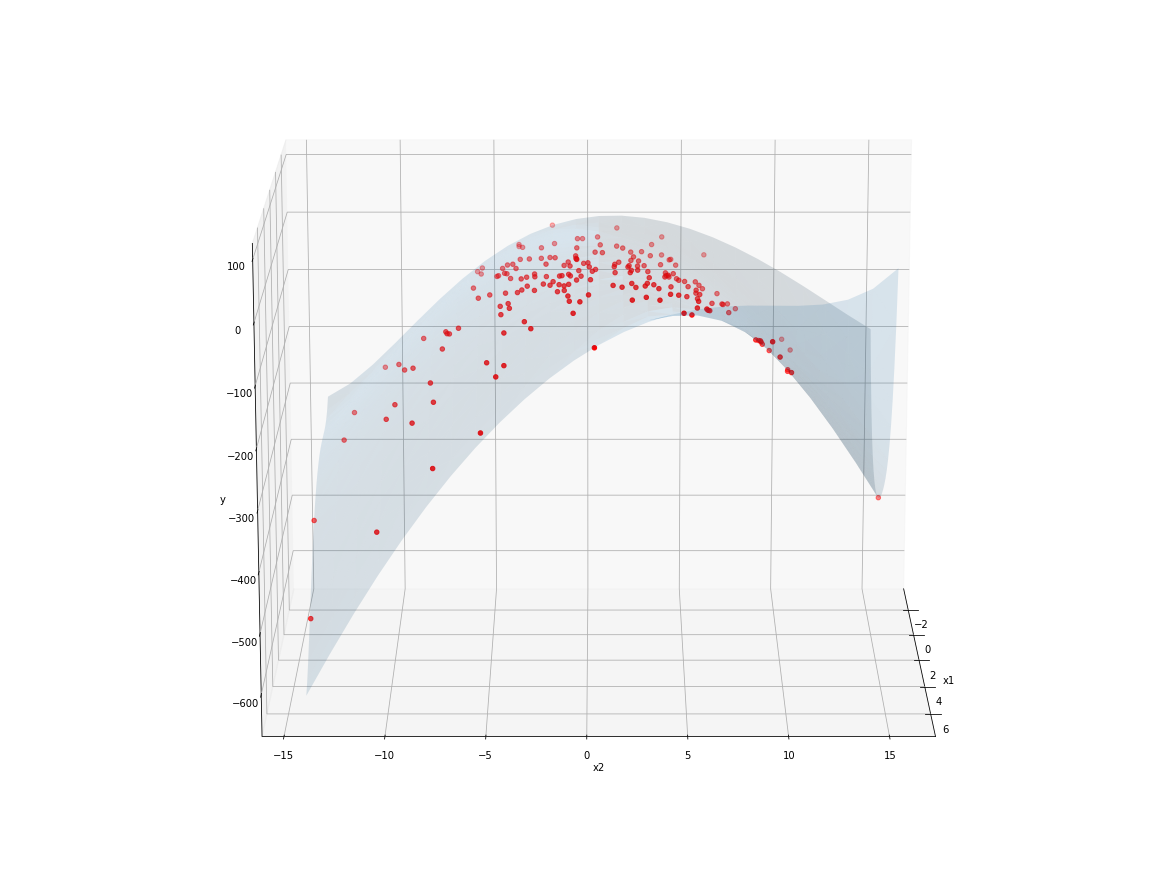

In [22]:
xs = []
ys = []

for x1 in np.linspace(df['x1'].min(), df['x1'].max(), 25):
    for x2 in np.linspace(df['x2'].min(), df['x2'].max(), 25):
        xs.append(x1)
        ys.append(x2)

X_surface = np.c_[xs, ys]
X_surface_poly = poly.fit_transform(X_surface)
zs = model6.predict(X_surface_poly)

fig = plt.figure(figsize=(16,12))
plt.clf()
ax = Axes3D(fig, elev=15, azim=0)

ax.scatter(X_train2[:, 0], X_train2[:, 1], y_train2, c = 'r', marker='o')
ax.plot_trisurf(xs, ys, zs, alpha=.15)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

def update(i):
    ax.azim = i
    return ax

anim = FuncAnimation(fig, update, frames=range(361), interval=33)

anim.save('3d_poly_regression_plot_model6.gif', dpi=80, writer='imagemagick')